In [276]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [277]:
import matplotlib.pyplot as plt

In [278]:
import pandas as pd
import numpy as np

In [279]:
iris=pd.read_csv(r"C:\Users\hp\Desktop\Project5\dataset.csv")


In [280]:
print(iris)

     Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  Attending a surprise birthday 

In [281]:
print(iris.head(5))


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #

### Let's clean the data a little

In [282]:
#removed the unnamed coloums that were extra
iris_cleaned = iris.loc[:, ~iris.columns.str.contains('^Unnamed')]
print(iris_cleaned.head())


                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                                 5     10     Canada      
2   #Fitness #Workout           

### Resetting the index

In [283]:
iris_cleaned = iris_cleaned.reset_index(drop=True)
print(iris_cleaned.head())


                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                                 5     10     Canada      
2   #Fitness #Workout           

In [285]:
print(iris_cleaned.dtypes) #to check datatype


Text         object
Sentiment    object
Timestamp    object
User         object
Platform     object
Hashtags     object
Retweets      int64
Likes         int64
Country      object
Year          int64
Month         int64
Day           int64
Hour          int64
dtype: object


In [286]:
print(type(iris))
df=iris.copy()

print(df.columns)
df.drop('Unnamed: 0.1',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.columns)
print(df)


<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  Attending a surpri

In [287]:
print(df.shape,df.dtypes)

(732, 13) Text         object
Sentiment    object
Timestamp    object
User         object
Platform     object
Hashtags     object
Retweets      int64
Likes         int64
Country      object
Year          int64
Month         int64
Day           int64
Hour          int64
dtype: object


In [288]:
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [289]:
df.isnull()


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False,False,False,False,False,False,False


### Convert postiive as 1 and negtive as 0 

In [290]:
print(df.head(5))
print(df['Sentiment'].unique())
df['Sentiment']=df['Sentiment'].astype(str)
#df['Sentiment']=df['Sentiment'].str.strip().map({'Positive':1,'Negative':0})
#print(df['Sentiment'].head(5))

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                                 5     10     Canada      
2   #Fitness #Workout           

### SO i got a good overview of my dataset now...there are more than 2 sentiments in my dataset and finally i need to sort them out

In [291]:
sentiment_map = {
    'Positive': ['Happiness', 'Joy', 'Love', 'Admiration', 'Affection', 'Excitement', 'Contentment', 'Pride', 'Confidence', 'Hope', 'Gratitude', 'Optimism', 'Euphoria', 'Fulfillment', 'Enthusiasm', 'Inspiration', 'Motivation', 'Empowerment', 'Success', 'Celebration', 'Triumph', 'Wonderment','Positive', 'Kindness', 'Friendship', 'Awe', 'Radiance', 'Satisfaction'],
    'Negative': ['Negative','Sadness', 'Grief', 'Heartbreak', 'Loneliness', 'Despair', 'Sorrow', 'Frustration', 'Betrayal', 'Anxiety', 'Fear', 'Regret', 'Shame', 'Helplessness', 'Resentment', 'Intimidation', 'Pain', 'Loss', 'Melancholy', 'Exhaustion', 'Desperation', 'Isolation', 'Numbness', 'Desolation', 'Suffering', 'EmotionalStorm'],
    'Neutral': ['Neutral', 'Boredom', 'Indifference', 'Contemplation', 'Reflection', 'Acceptance', 'Serenity', 'Calmness', 'Peace', 'Understanding', 'Clarity'],
    'Excitement': ['Thrill','Excitement', 'Adrenaline', 'Anticipation', 'Intrigue', 'Wonder', 'Adventure', 'Playful', 'Curiosity', 'Exploration', 'Spontaneity', 'Fun'],
    'Surprise': ['Surprise', 'Awe', 'Wonder', 'Amazement', 'Enchantment', 'Fascination', 'Revelation', 'Stimulation', 'Dazzle'],
    'Love': ['Love','Compassion', 'Empathy', 'Tenderness', 'Sympathy', 'Caring', 'Support', 'Encouragement', 'Connection', 'Joy in Giving']
}
#print(df['Sentiment'].head(10))
#print(type(df['Sentiment']))
#df['Sentiment']=df['Sentiment'].astype(str)
#print(type(df['Sentiment']))
#df['Sentiment']=df['Sentiment'].map(sentiment_map)
#print(df['Sentiment'].head(10))
# Function to map sentiment to the corresponding class
"""def map_sentiment_to_class(sentiment):
    sentiment = sentiment.strip()  # Strip any leading or trailing spaces
    for sentiment_class, sentiments_list in sentiment_map.items():
        if sentiment in sentiments_list:  # Check if the sentiment matches any in the list
            return sentiment_class
    return 'Unknown'  # in case there is an unclassified sentiment

# Apply the mapping function to the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].apply(map_sentiment_to_class)

# Check the first few rows of the updated dataframe
print(df['Sentiment'].tail(300))
"""
# Function to map sentiment to the corresponding class
def map_sentiment_to_class(sentiment):
    sentiment = sentiment.strip()  # Strip any leading or trailing spaces
    for sentiment_class, sentiments_list in sentiment_map.items():
        if sentiment in sentiments_list:  # Check if the sentiment matches any in the list
            return sentiment_class
    # If a sentiment doesn't match any class, don't assign it anything (i.e., do not map)
    return None  # or simply skip it, depending on your requirement

# Apply the mapping function to the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].apply(map_sentiment_to_class)

# Remove rows where sentiment is None (i.e., no valid sentiment found)
df = df[df['Sentiment'].notna()]

# Check the first few rows of the updated dataframe
print(df['Sentiment'].head(10))


0    Positive
1    Negative
2    Positive
3    Positive
4     Neutral
5    Positive
6    Positive
7    Positive
8    Negative
9     Neutral
Name: Sentiment, dtype: object


In [292]:
print(df['Sentiment'].unique())

['Positive' 'Negative' 'Neutral' 'Surprise' 'Excitement' 'Love']


### We've made 6 different classes out of so many !!!

### Let's Continue with it now

In [293]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [294]:
#let's plot sentiments with platforms
print(df['Platform'])
print(df['Platform'].unique())

0        Twitter  
1        Twitter  
2       Instagram 
3        Facebook 
4       Instagram 
          ...     
713      Facebook 
714       Twitter 
715     Instagram 
716      Facebook 
717       Twitter 
Name: Platform, Length: 458, dtype: object
[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']


In [295]:
df['Platform']=df['Platform'].astype(str)
df['Platform']=df['Platform'].str.strip()

print(df['Platform'].unique())

['Twitter' 'Instagram' 'Facebook']


In [296]:
type(df['Platform'])
x=list(df['Platform'])
print(x)

['Twitter', 'Twitter', 'Instagram', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Instagram', 'Facebook', 'Instagram', 'Facebook', 'Twitter', 'Twitter', 'Instagram', 'Facebook', 'Instagram', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Facebook', 'Instagram', 'Facebook', 'Instagram', 'Facebook', 'Twitter', 'Twitter', 'Instagram', 'Facebook', 'Instagram', 'Facebook', 'Instagram', 'Twitter', 'Facebook', 'Instagram', 'Facebook', 'Twitter

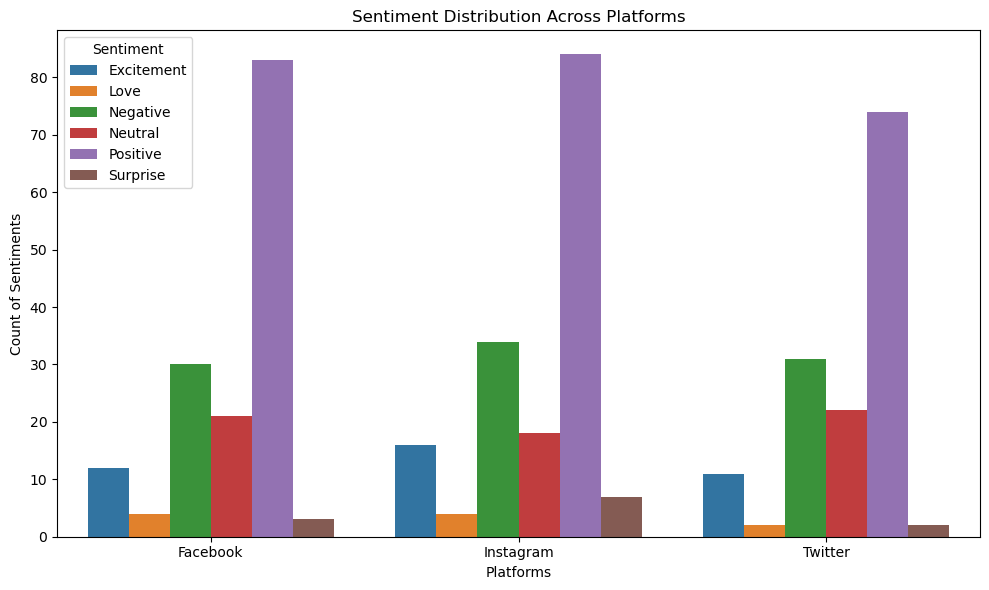

In [297]:
import seaborn as sns


# Group by 'Platform' and 'Sentiment' and count the occurrences
sentiment_counts = df.groupby(['Platform', 'Sentiment']).size().reset_index(name='Count')

# Plot the results using seaborn for a better visual
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='Platform', y='Count', hue='Sentiment')

# Adding labels and title
plt.title('Sentiment Distribution Across Platforms')
plt.xlabel('Platforms')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()


In [298]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['Tokenized Text']=df['Text'].apply(word_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [299]:
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### applying stemming

In [300]:
'''Stemmer=PorterStemmer()
corpus=df['Tokenized Text']
for document in corpus:
    document=re.sub('[^a-zA-Z]','',corpus)
    for word in document:
        word=word.lower()
        word=word.split()
        
        if word not in set (stopwords.words('english')):
            word=stemmer.step(word)'''

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Clean and process the text
corpus = df['Tokenized Text']  # This is the tokenized text column
cleaned_corpus = []  # To store the cleaned text

# Iterate through each document in the corpus
for document in corpus:
    # Join the list of tokens back into a single string
    document = " ".join(document)
    # Remove non-alphabetic characters
    document = re.sub('[^a-zA-Z]', ' ', document)
    # Tokenize the cleaned text
    tokens = word_tokenize(document)
    # Remove stopwords and convert to lowercase
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    # Join the tokens back into a single string
    document = " ".join(filtered_tokens)
    # Remove extra spaces
    document = re.sub(r'\s+', ' ', document).strip()
    # Append to the cleaned corpus
    cleaned_corpus.append(document)

# Add the cleaned corpus as a new column in the DataFrame
df['Cleaned Text'] = cleaned_corpus

# Display the DataFrame
print(df[['Text', 'Tokenized Text', 'Cleaned Text']])


                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
713  Participating in a science fair to showcase a ...   
714  Attending a workshop on time management to enh...   
715  Volunteering at a local charity event to give ...   
716  Collaborating on a group project to promote te...   
717  Participating in a debate club to enhance crit...   

                                        Tokenized Text  \
0      [Enjoying, a, beautiful, day, at, the, park, !]   
1           [Traffic, was, terrible, this, morning, .]   
2         [Just, finished, an, amazing, workout, !, 💪]   
3    [Excited, about, the, upcoming, weekend, getaw...   
4    [Trying,

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatizing

In [301]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text_nltk(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Lemmatize each word and return the sentence
    return " ".join([lemmatizer.lemmatize(word, pos='v') for word in words])  # 'v' for verbs

# Apply lemmatization to the "Cleaned Text" column
df['Cleaned Text'] = df['Cleaned Text'].apply(lemmatize_text_nltk)

# Check the updated "Cleaned Text"
print(df[['Cleaned Text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                      Cleaned Text
0         enjoy beautiful day park
1         traffic terrible morning
2             finish amaze workout
3  excite upcoming weekend getaway
4    try new recipe dinner tonight


In [302]:
df.head()



,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Tokenized Text,Cleaned Text
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,"[Enjoying, a, beautiful, day, at, the, park, !]",enjoy beautiful day park
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,"[Traffic, was, terrible, this, morning, .]",traffic terrible morning
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,"[Just, finished, an, amazing, workout, !, 💪]",finish amaze workout
3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,"[Excited, about, the, upcoming, weekend, getaw...",excite upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,"[Trying, out, a, new, recipe, for, dinner, ton...",try new recipe dinner tonight


### sentiment tranformation into numerical form

In [303]:
# Define the sentiment mapping
sentiment_mapping = {
    'Positive': 0,
    'Negative': 1,
    'Neutral': 2,
    'Surprise': 3,
    'Excitement': 4,
    'Love': 5
}

# Directly map and update the 'Sentiments' column in the DataFrame
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Check the updated DataFrame
print(df[['Sentiment']].head())


   Sentiment
0          0
1          1
2          0
3          0
4          2


In [304]:
print(df['Sentiment'].unique())

[0 1 2 3 4 5]


### Vectorization

In [313]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have a dataframe 'df' with cleaned text in 'Cleaned Text' column and encoded sentiments in 'Sentiments' column

# Step 1: Vectorize the cleaned text using TF-IDF
cv = TfidfVectorizer(ngram_range=(1,1),max_features=1000, min_df=5)

# Fit and transform the cleaned text data into a TF-IDF matrix
X = cv.fit_transform(df['Cleaned Text'])

# Convert the TF-IDF matrix to a DataFrame for better visualization
X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# Step 2: Check the DataFrame shape and first few rows
print("Shape of the TF-IDF DataFrame:", X_df.shape)
print(X_df.head())

# Step 3: Prepare the target variable (Sentiments) and the feature matrix (TF-IDF)
y = df['Sentiment']  # Sentiments column (target variable)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Step 5: Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Step 6: Train the model
logreg_model.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred = logreg_model.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy * 100:.2f}%")


Shape of the TF-IDF DataFrame: (458, 162)
   acceptance  achieve  adventure  age  ahead  air  ancient  art  attend  \
0         0.0      0.0        0.0  0.0    0.0  0.0      0.0  0.0     0.0   
1         0.0      0.0        0.0  0.0    0.0  0.0      0.0  0.0     0.0   
2         0.0      0.0        0.0  0.0    0.0  0.0      0.0  0.0     0.0   
3         0.0      0.0        0.0  0.0    0.0  0.0      0.0  0.0     0.0   
4         0.0      0.0        0.0  0.0    0.0  0.0      0.0  0.0     0.0   

   away  ...       try  turn  upcoming  wave   weekend  whisper  wonder  work  \
0   0.0  ...  0.000000   0.0  0.000000   0.0  0.000000      0.0     0.0   0.0   
1   0.0  ...  0.000000   0.0  0.000000   0.0  0.000000      0.0     0.0   0.0   
2   0.0  ...  0.000000   0.0  0.000000   0.0  0.000000      0.0     0.0   0.0   
3   0.0  ...  0.000000   0.0  0.707107   0.0  0.707107      0.0     0.0   0.0   
4   0.0  ...  0.824508   0.0  0.000000   0.0  0.000000      0.0     0.0   0.0   

   world  year